In [2]:
import pyspark
import random
import time
from pyspark.sql import functions as F

from pyspark.sql.functions import *

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Custom Details").getOrCreate()


In [3]:
movies = 50
users = 100
records = 1000

data =[]
for _ in range(records):
    m_id = random.randint(1,movies)
    u_id = random.randint(1,users)
    rating = random.randint(1,5)
    time_stamp = random.randint(1000000000,int(time.time()))
    data.append((m_id,u_id,rating,time_stamp))

schema = ['MovieID', 'UserID', 'Rating' ,'Timestamp']
df = spark.createDataFrame(data,schema = schema)

C:\Users\ranju\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df.show()

+-------+------+------+----------+
|MovieID|UserID|Rating| Timestamp|
+-------+------+------+----------+
|     42|    74|     2|1340713679|
|     29|    69|     3|1576480350|
|     32|    61|     3|1510888305|
|     28|    76|     5|1247202021|
|     40|    88|     5|1165440721|
|     18|    41|     1|1125777299|
|     16|    76|     1|1586756300|
|     17|    75|     2|1348530025|
|     34|    48|     4|1313070485|
|     41|    67|     5|1622562631|
|      2|    15|     2|1551622299|
|      3|    77|     2|1178126233|
|     24|    89|     3|1312739510|
|     26|    45|     2|1576174939|
|     10|    78|     3|1193681423|
|     49|    15|     4|1351426075|
|     40|    48|     2|1479525782|
|     16|    37|     2|1127361718|
|     29|    33|     5|1649266625|
|      4|    87|     5|1607896005|
+-------+------+------+----------+
only showing top 20 rows



In [5]:
from pyspark.sql.functions import from_unixtime
df = df.withColumn("Readable_Timestamp", from_unixtime(df.Timestamp))
df.show()

+-------+------+------+----------+-------------------+
|MovieID|UserID|Rating| Timestamp| Readable_Timestamp|
+-------+------+------+----------+-------------------+
|     42|    74|     2|1340713679|2012-06-26 17:57:59|
|     29|    69|     3|1576480350|2019-12-16 12:42:30|
|     32|    61|     3|1510888305|2017-11-17 08:41:45|
|     28|    76|     5|1247202021|2009-07-10 10:30:21|
|     40|    88|     5|1165440721|2006-12-07 03:02:01|
|     18|    41|     1|1125777299|2005-09-04 01:24:59|
|     16|    76|     1|1586756300|2020-04-13 11:08:20|
|     17|    75|     2|1348530025|2012-09-25 05:10:25|
|     34|    48|     4|1313070485|2011-08-11 19:18:05|
|     41|    67|     5|1622562631|2021-06-01 21:20:31|
|      2|    15|     2|1551622299|2019-03-03 19:41:39|
|      3|    77|     2|1178126233|2007-05-02 22:47:13|
|     24|    89|     3|1312739510|2011-08-07 23:21:50|
|     26|    45|     2|1576174939|2019-12-12 23:52:19|
|     10|    78|     3|1193681423|2007-10-29 23:40:23|
|     49| 

In [6]:
average_ratings = df.groupBy("MovieID").agg(avg("Rating").alias("Average_Rating"))

average_ratings.show()

+-------+------------------+
|MovieID|    Average_Rating|
+-------+------------------+
|     29|            3.1875|
|     26|2.6666666666666665|
|      7| 2.652173913043478|
|     34|               3.5|
|     50|3.1363636363636362|
|     32|3.3529411764705883|
|     43| 2.923076923076923|
|     31|2.9285714285714284|
|     39|2.8095238095238093|
|      6| 2.857142857142857|
|      9|            3.1875|
|     27|3.1666666666666665|
|     17|2.8260869565217392|
|     41|3.1666666666666665|
|     28| 3.608695652173913|
|      5|               3.2|
|      1|               2.7|
|     10|3.3636363636363638|
|     48| 3.217391304347826|
|     44|3.0476190476190474|
+-------+------------------+
only showing top 20 rows



In [7]:
user_count = df.groupBy("UserID").agg(count("Rating").alias("Rating_Count"))
users_ratings = user_count.filter(user_count.Rating_Count > 5)

users_ratings.show()


+------+------------+
|UserID|Rating_Count|
+------+------------+
|    29|           6|
|    54|          11|
|    77|          12|
|    34|          11|
|    94|          10|
|    43|           6|
|    31|          11|
|    98|          11|
|    39|          13|
|    95|           7|
|    68|          16|
|    87|          14|
|    72|          15|
|    58|          11|
|    27|          11|
|    56|          10|
|    17|          11|
|    79|           7|
|    41|           7|
|    88|          11|
+------+------------+
only showing top 20 rows



In [8]:
high_rated = df.groupby('MovieID').agg(avg('Rating').alias("avg_rating"))
top = high_rated.orderBy('avg_rating',ascending = False).limit(5)
top.show()

+-------+------------------+
|MovieID|        avg_rating|
+-------+------------------+
|     25| 3.611111111111111|
|     28| 3.608695652173913|
|      4|3.5454545454545454|
|     38|3.5454545454545454|
|     34|               3.5|
+-------+------------------+



C:\Users\ranju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


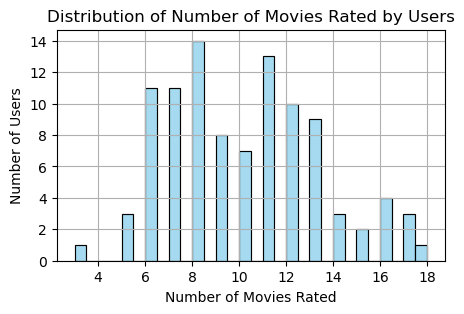

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies rated by each user
user_ratings_count = df.groupBy("UserID").agg(count("MovieID").alias("Movies_Rated"))

# Convert the Spark DataFrame to Pandas DataFrame
user_ratings_count_pd = user_ratings_count.toPandas()

# Plot the visualization
plt.figure(figsize=(5,3))
sns.histplot(user_ratings_count_pd["Movies_Rated"], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Number of Movies Rated by Users")
plt.xlabel("Number of Movies Rated")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


In [10]:
spark.stop()

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, unix_timestamp
import random
from datetime import datetime, timedelta


spark = SparkSession.builder.appName('TripAnalysis').getOrCreate()

schema = ["TripID", "StartTime", "EndTime", "Distance", "Fare"]

data = []
for i in range(1, 101):  
    trip_id = i
    start_time = datetime.now() - timedelta(days=random.randint(0, 30))
    end_time = start_time + timedelta(minutes=random.randint(10, 60))
    distance = random.randint(1, 50)  # distance in miles
    fare = random.randint(5, 100)  # fare in dollars
    data.append((trip_id, start_time.strftime("%Y-%m-%d %H:%M:%S"), 
                 end_time.strftime("%Y-%m-%d %H:%M:%S"), distance, fare))


df = spark.createDataFrame(data, schema)
df.show(5)  


+------+-------------------+-------------------+--------+----+
|TripID|          StartTime|            EndTime|Distance|Fare|
+------+-------------------+-------------------+--------+----+
|     1|2024-12-17 17:38:11|2024-12-17 17:55:11|       3|  49|
|     2|2024-12-11 17:38:11|2024-12-11 18:13:11|      48|  98|
|     3|2024-12-12 17:38:11|2024-12-12 18:18:11|       4|  92|
|     4|2024-11-30 17:38:11|2024-11-30 18:11:11|      32|   7|
|     5|2024-12-17 17:38:11|2024-12-17 18:03:11|      35|  32|
+------+-------------------+-------------------+--------+----+
only showing top 5 rows



In [12]:
# Convert string columns to timestamp format
df = df.withColumn("StartTime", unix_timestamp("StartTime", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))
df = df.withColumn("EndTime", unix_timestamp("EndTime", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))

df = df.withColumn("Duration", (col("EndTime").cast("long") - col("StartTime").cast("long")) / 60)
df.show(5)


+------+-------------------+-------------------+--------+----+--------+
|TripID|          StartTime|            EndTime|Distance|Fare|Duration|
+------+-------------------+-------------------+--------+----+--------+
|     1|2024-12-17 17:38:11|2024-12-17 17:55:11|       3|  49|    17.0|
|     2|2024-12-11 17:38:11|2024-12-11 18:13:11|      48|  98|    35.0|
|     3|2024-12-12 17:38:11|2024-12-12 18:18:11|       4|  92|    40.0|
|     4|2024-11-30 17:38:11|2024-11-30 18:11:11|      32|   7|    33.0|
|     5|2024-12-17 17:38:11|2024-12-17 18:03:11|      35|  32|    25.0|
+------+-------------------+-------------------+--------+----+--------+
only showing top 5 rows



In [13]:
df = df.withColumn("FarePerMile", col("Fare") / col("Distance"))
df.select("TripID", "FarePerMile").show(5)


+------+------------------+
|TripID|       FarePerMile|
+------+------------------+
|     1|16.333333333333332|
|     2|2.0416666666666665|
|     3|              23.0|
|     4|           0.21875|
|     5|0.9142857142857143|
+------+------------------+
only showing top 5 rows



In [14]:
top_3_longest_trips = df.orderBy(col("Distance").desc()).limit(3)
top_3_longest_trips.show()

+------+-------------------+-------------------+--------+----+--------+------------------+
|TripID|          StartTime|            EndTime|Distance|Fare|Duration|       FarePerMile|
+------+-------------------+-------------------+--------+----+--------+------------------+
|    96|2024-11-23 17:38:11|2024-11-23 18:02:11|      50|  53|    24.0|              1.06|
|    28|2024-12-13 17:38:11|2024-12-13 17:52:11|      50|  10|    14.0|               0.2|
|    12|2024-11-28 17:38:11|2024-11-28 17:54:11|      49|  79|    16.0|1.6122448979591837|
+------+-------------------+-------------------+--------+----+--------+------------------+



In [15]:
# Extract hour from StartTime
df = df.withColumn("HourOfDay", hour("StartTime"))
df.show()

# Group by HourOfDay and count trips
hourly_trip_count = df.groupBy("HourOfDay").count().orderBy("HourOfDay")
hourly_trip_count.show()

+------+-------------------+-------------------+--------+----+--------+------------------+---------+
|TripID|          StartTime|            EndTime|Distance|Fare|Duration|       FarePerMile|HourOfDay|
+------+-------------------+-------------------+--------+----+--------+------------------+---------+
|     1|2024-12-17 17:38:11|2024-12-17 17:55:11|       3|  49|    17.0|16.333333333333332|       17|
|     2|2024-12-11 17:38:11|2024-12-11 18:13:11|      48|  98|    35.0|2.0416666666666665|       17|
|     3|2024-12-12 17:38:11|2024-12-12 18:18:11|       4|  92|    40.0|              23.0|       17|
|     4|2024-11-30 17:38:11|2024-11-30 18:11:11|      32|   7|    33.0|           0.21875|       17|
|     5|2024-12-17 17:38:11|2024-12-17 18:03:11|      35|  32|    25.0|0.9142857142857143|       17|
|     6|2024-12-15 17:38:11|2024-12-15 17:50:11|      47|  86|    12.0|1.8297872340425532|       17|
|     7|2024-12-07 17:38:11|2024-12-07 18:18:11|      26|  77|    40.0|2.9615384615384617| 

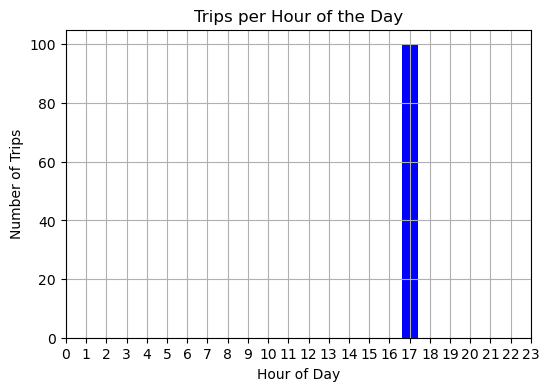

In [16]:
hourly_trip_count_pd = hourly_trip_count.toPandas()

plt.figure(figsize=(6,4))
plt.bar(hourly_trip_count_pd["HourOfDay"], hourly_trip_count_pd["count"], color='blue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour of the Day")
plt.xticks(range(24))  
plt.grid(True)
plt.show()

In [17]:
spark.stop()

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract
from datetime import datetime, timedelta
import random

spark = SparkSession.builder.appName('LogAnalysis').getOrCreate()

log_levels = ['INFO', 'ERROR', 'DEBUG', 'WARN']
messages = {
    'INFO': ['User logged in', 'Data uploaded successfully', 'Request processed'],
    'ERROR': ['Page not found', 'Database connection failed', 'Unauthorized access'],
    'DEBUG': ['Debugging issue X', 'Memory usage is high', 'API response time'],
    'WARN': ['Low disk space', 'High CPU usage']
}

# Create a log file
with open('sample_log.txt', 'w') as f:
    for i in range(100): 
        timestamp = (datetime.now() - timedelta(minutes=random.randint(1, 1000))).strftime('%Y-%m-%d %H:%M:%S')
        log_level = random.choice(log_levels)
        message = random.choice(messages[log_level])
        log_entry = f"{timestamp} {log_level} {message}\n"
        f.write(log_entry)
        
#Load the Log File into a PySpark DataFrame
log_df = spark.read.text('sample_log.txt')
log_df.show(10)

+--------------------+
|               value|
+--------------------+
|2024-12-20 12:09:...|
|2024-12-20 09:20:...|
|2024-12-20 03:47:...|
|2024-12-20 14:54:...|
|2024-12-20 10:47:...|
|2024-12-20 05:54:...|
|2024-12-20 12:35:...|
|2024-12-20 06:17:...|
|2024-12-20 14:44:...|
|2024-12-20 04:48:...|
+--------------------+
only showing top 10 rows



In [20]:
log_df = log_df.withColumn('Timestamp', regexp_extract('value', r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})', 1)) \
               .withColumn('LogLevel', regexp_extract('value', r'\s([A-Z]+)\s', 1)) \
               .withColumn('Message', regexp_extract('value', r'([A-Za-z0-9\s]+)', 1))

log_df.select('Timestamp', 'LogLevel', 'Message').show(10)

+-------------------+--------+-------+
|          Timestamp|LogLevel|Message|
+-------------------+--------+-------+
|2024-12-20 12:09:39|    INFO|   2024|
|2024-12-20 09:20:39|   DEBUG|   2024|
|2024-12-20 03:47:39|   ERROR|   2024|
|2024-12-20 14:54:39|    WARN|   2024|
|2024-12-20 10:47:39|    INFO|   2024|
|2024-12-20 05:54:39|    WARN|   2024|
|2024-12-20 12:35:39|    WARN|   2024|
|2024-12-20 06:17:39|    INFO|   2024|
|2024-12-20 14:44:39|    WARN|   2024|
|2024-12-20 04:48:39|    INFO|   2024|
+-------------------+--------+-------+
only showing top 10 rows



In [21]:
log_count = log_df.groupBy('LogLevel').count()
log_count.show()

+--------+-----+
|LogLevel|count|
+--------+-----+
|    INFO|   29|
|   ERROR|   20|
|    WARN|   28|
|   DEBUG|   23|
+--------+-----+



In [22]:
error = log_df.filter(log_df.LogLevel == 'ERROR')
error.show()
error.count()

+--------------------+-------------------+--------+-------+
|               value|          Timestamp|LogLevel|Message|
+--------------------+-------------------+--------+-------+
|2024-12-20 03:47:...|2024-12-20 03:47:39|   ERROR|   2024|
|2024-12-20 12:25:...|2024-12-20 12:25:39|   ERROR|   2024|
|2024-12-20 16:21:...|2024-12-20 16:21:39|   ERROR|   2024|
|2024-12-20 02:13:...|2024-12-20 02:13:39|   ERROR|   2024|
|2024-12-20 11:17:...|2024-12-20 11:17:39|   ERROR|   2024|
|2024-12-20 07:23:...|2024-12-20 07:23:39|   ERROR|   2024|
|2024-12-20 01:10:...|2024-12-20 01:10:39|   ERROR|   2024|
|2024-12-20 04:08:...|2024-12-20 04:08:39|   ERROR|   2024|
|2024-12-20 15:29:...|2024-12-20 15:29:39|   ERROR|   2024|
|2024-12-20 06:38:...|2024-12-20 06:38:39|   ERROR|   2024|
|2024-12-20 06:18:...|2024-12-20 06:18:39|   ERROR|   2024|
|2024-12-20 01:35:...|2024-12-20 01:35:39|   ERROR|   2024|
|2024-12-20 07:02:...|2024-12-20 07:02:39|   ERROR|   2024|
|2024-12-20 09:12:...|2024-12-20 09:12:3

20

In [23]:
log_df = log_df.withColumn('Timestamp', to_timestamp('Timestamp', 'yyyy-MM-dd HH:mm:ss'))

log_df = log_df.withColumn('Hour', hour('Timestamp'))

hour_log = log_df.groupBy('Hour').count().orderBy('Hour')
hour_log.show()

+----+-----+
|Hour|count|
+----+-----+
|   1|   10|
|   2|    5|
|   3|    4|
|   4|    7|
|   5|    5|
|   6|    7|
|   7|    7|
|   8|    7|
|   9|    8|
|  10|    7|
|  11|    5|
|  12|    9|
|  13|    3|
|  14|    4|
|  15|    5|
|  16|    3|
|  17|    4|
+----+-----+



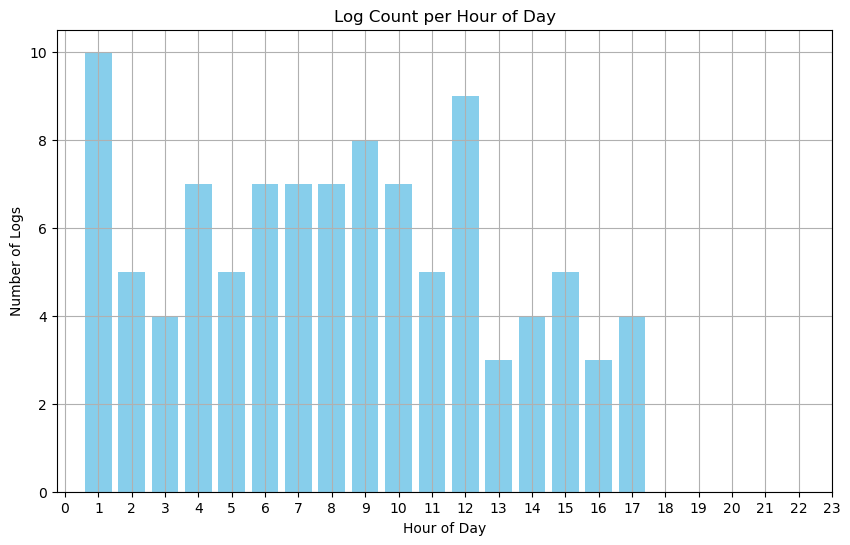

In [26]:
hour_pd = hour_log.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(hour_pd['Hour'], hour_pd['count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logs')
plt.title('Log Count per Hour of Day')
plt.xticks(range(24))  
plt.grid(True)
plt.show()

In [27]:
spark.stop()